In [47]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.models import load_model
from keras import optimizers

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [2]:
raw_path = "D:\\kaggle\\version2\\투빅스 오디오"
train_image_path = "D:\\kaggle\\version2\\투빅스 오디오\\train_image"
val_image_path  = "D:\\kaggle\\version2\\투빅스 오디오\\val_image"

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_image_path,
        target_size=(286, 278),
        #batch_size=64,
        class_mode='categorical')

Found 180 images belonging to 3 classes.


In [92]:
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
        val_image_path,
        target_size=(286, 278),    
        batch_size=60,
        class_mode='categorical',
shuffle=False)

Found 60 images belonging to 3 classes.


In [5]:
model1 = Sequential()

model1.add(Conv2D(8, kernel_size=(3, 3), activation='elu',input_shape=(286,278,3),kernel_initializer= 'glorot_normal' ))

model1.add(Conv2D(filters = 16, kernel_size = (3, 3), strides=1,activation='elu',kernel_initializer= 'glorot_normal'))
model1.add(MaxPooling2D(pool_size=(3, 3)))

model1.add(Conv2D(32, (3, 3), activation='elu', strides=1,kernel_initializer= 'glorot_normal'))
model1.add(MaxPooling2D(pool_size=(3, 3)))

model1.add(Conv2D(64, (3, 3), activation='elu', strides=1,kernel_initializer= 'glorot_normal'))
model1.add(MaxPooling2D(pool_size=(3, 3)))

model1.add(Flatten())
model1.add(Dense(128, activation='elu',kernel_initializer= 'glorot_normal'))
model1.add(Dropout(0.5))
model1.add(Dense(64, activation='elu',kernel_initializer= 'glorot_normal'))

model1.add(Dense(len(train_generator.class_indices) , activation='softmax'))
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 284, 276, 8)       224       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 282, 274, 16)      1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 94, 91, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 92, 89, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 29, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 27, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 9, 9, 64)          0         
__________

In [6]:
model2 = Sequential()
model2.add(Conv2D(8, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=(286,278,3),kernel_initializer= 'glorot_normal'))

model2.add(Conv2D(filters = 16, kernel_size = (5, 5), strides=1,activation='relu',kernel_initializer= 'glorot_normal'))
model2.add(MaxPooling2D(pool_size=(3, 3)))

model2.add(Conv2D(32, (5, 5), activation='relu',kernel_initializer= 'glorot_normal'))
model2.add(MaxPooling2D(pool_size=(3, 3)))

model2.add(Conv2D(64, (5, 5), activation='relu',kernel_initializer= 'glorot_normal'))
model2.add(MaxPooling2D(pool_size=(3, 3)))

model2.add(Flatten())
model2.add(Dense(128, activation='relu',kernel_initializer= 'glorot_normal'))
model2.add(Dropout(0.5))
model2.add(Dense(64, activation='relu',kernel_initializer= 'glorot_normal'))

model2.add(Dense(len(train_generator.class_indices), activation='softmax'))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 282, 274, 8)       608       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 278, 270, 16)      3216      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 92, 90, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 88, 86, 32)        12832     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 29, 28, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 25, 24, 64)        51264     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
__________

In [7]:
model3 = Sequential()
model3.add(Conv2D(8, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=(286,278,3),kernel_initializer= 'glorot_normal'))
model3.add(MaxPooling2D(pool_size=(3, 3)))

model3.add(Conv2D(filters = 16, kernel_size = (5, 5), strides=1,activation='relu',kernel_initializer= 'glorot_normal'))
model3.add(MaxPooling2D(pool_size=(3, 3)))

model3.add(Conv2D(32, (5, 5), activation='relu',kernel_initializer= 'glorot_normal'))
model3.add(MaxPooling2D(pool_size=(3, 3)))

model3.add(Conv2D(64, (5, 5), activation='relu',kernel_initializer= 'glorot_normal'))


model3.add(Flatten())
model3.add(Dense(128, activation='relu',kernel_initializer= 'glorot_normal'))
model3.add(Dropout(0.3))
model3.add(Dense(64, activation='relu',kernel_initializer= 'glorot_normal'))

model3.add(Dense(len(train_generator.class_indices), activation='softmax'))
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 282, 274, 8)       608       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 94, 91, 8)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 90, 87, 16)        3216      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 30, 29, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 26, 25, 32)        12832     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 4, 4, 64)          51264     
__________

In [8]:
model4 = Sequential()
model4.add(Conv2D(8, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=(286,278,3),kernel_initializer= 'glorot_normal'))

model4.add(Conv2D(filters = 16, kernel_size = (5, 5), strides=1,activation='relu',kernel_initializer= 'glorot_normal'))
model4.add(MaxPooling2D(pool_size=(3, 3)))

model4.add(Conv2D(32, (5, 5), activation='relu',kernel_initializer= 'glorot_normal'))
model4.add(MaxPooling2D(pool_size=(3, 3)))

model4.add(Conv2D(64, (5, 5), activation='relu',kernel_initializer= 'glorot_normal'))
model4.add(MaxPooling2D(pool_size=(3, 3)))

model4.add(Conv2D(128, (5, 5), activation='relu',kernel_initializer= 'glorot_normal'))


model4.add(Flatten())
model4.add(Dense(128, activation='relu',kernel_initializer= 'glorot_normal'))
model4.add(Dropout(0.5))
model4.add(Dense(64, activation='relu',kernel_initializer= 'glorot_normal'))

model4.add(Dense(len(train_generator.class_indices), activation='softmax'))
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 282, 274, 8)       608       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 278, 270, 16)      3216      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 92, 90, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 88, 86, 32)        12832     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 29, 28, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 25, 24, 64)        51264     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 8, 8, 64)          0         
__________

In [9]:
sgd = optimizers.SGD(lr=0.01, decay=1e-5, momentum=0.9, nesterov=True)

In [10]:
model1.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model3.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model4.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [11]:
hist = model1.fit_generator(
        train_generator,
        steps_per_epoch=10,
        epochs=80,
        validation_data=val_generator,
        validation_steps=25)#,
        #callbacks=[early, reduce])

Epoch 1/80
10/10 [==============================] - 8s 770ms/step - loss: 1.1289 - acc: 0.3489 - val_loss: 1.1200 - val_acc: 0.3351
Epoch 2/80
10/10 [==============================] - 5s 521ms/step - loss: 1.0675 - acc: 0.4079 - val_loss: 1.1185 - val_acc: 0.3364
Epoch 3/80
10/10 [==============================] - 6s 587ms/step - loss: 1.0037 - acc: 0.4777 - val_loss: 1.1424 - val_acc: 0.3697
Epoch 4/80
10/10 [==============================] - 6s 596ms/step - loss: 0.9964 - acc: 0.5083 - val_loss: 1.1774 - val_acc: 0.3537
Epoch 5/80
10/10 [==============================] - 6s 551ms/step - loss: 0.9683 - acc: 0.5436 - val_loss: 1.1818 - val_acc: 0.3870
Epoch 6/80
10/10 [==============================] - 5s 550ms/step - loss: 0.9137 - acc: 0.5567 - val_loss: 1.1521 - val_acc: 0.3710
Epoch 7/80
10/10 [==============================] - 5s 483ms/step - loss: 0.9512 - acc: 0.5392 - val_loss: 1.2670 - val_acc: 0.3697
Epoch 8/80
10/10 [==============================] - 5s 519ms/step - loss: 0.

In [12]:
hist2 = model2.fit_generator(
        train_generator,
        steps_per_epoch=10,
        epochs=80,
        validation_data=val_generator,
        validation_steps=25)#,
        #callbacks=[early, reduce])

Epoch 1/80
10/10 [==============================] - 6s 640ms/step - loss: 1.0997 - acc: 0.3082 - val_loss: 1.0993 - val_acc: 0.3351
Epoch 2/80
10/10 [==============================] - 5s 526ms/step - loss: 1.0968 - acc: 0.3582 - val_loss: 1.0991 - val_acc: 0.3351
Epoch 3/80
10/10 [==============================] - 6s 551ms/step - loss: 1.0967 - acc: 0.3221 - val_loss: 1.0987 - val_acc: 0.3351
Epoch 4/80
10/10 [==============================] - 5s 547ms/step - loss: 1.0956 - acc: 0.3418 - val_loss: 1.0982 - val_acc: 0.3351
Epoch 5/80
10/10 [==============================] - 6s 594ms/step - loss: 1.0920 - acc: 0.4005 - val_loss: 1.0978 - val_acc: 0.3351
Epoch 6/80
10/10 [==============================] - 5s 538ms/step - loss: 1.0875 - acc: 0.4443 - val_loss: 1.0983 - val_acc: 0.3351
Epoch 7/80
10/10 [==============================] - 6s 583ms/step - loss: 1.0852 - acc: 0.4342 - val_loss: 1.0983 - val_acc: 0.3351
Epoch 8/80
10/10 [==============================] - 6s 563ms/step - loss: 1.

In [13]:
hist3 = model3.fit_generator(
        train_generator,
        steps_per_epoch=10, #20개 이미지를 300번 학습시키는 것이 1 epoch로 정의.
        epochs=80,
        validation_data=val_generator,
        validation_steps=25)#,
        #callbacks=[early, reduce])

Epoch 1/80
10/10 [==============================] - 5s 524ms/step - loss: 1.1021 - acc: 0.3161 - val_loss: 1.1001 - val_acc: 0.3085
Epoch 2/80
10/10 [==============================] - 5s 513ms/step - loss: 1.0956 - acc: 0.3834 - val_loss: 1.1002 - val_acc: 0.3191
Epoch 3/80
10/10 [==============================] - 5s 518ms/step - loss: 1.0937 - acc: 0.4002 - val_loss: 1.0984 - val_acc: 0.3710
Epoch 4/80
10/10 [==============================] - 4s 419ms/step - loss: 1.0904 - acc: 0.4139 - val_loss: 1.0989 - val_acc: 0.4588
Epoch 5/80
10/10 [==============================] - 4s 447ms/step - loss: 1.0931 - acc: 0.3561 - val_loss: 1.0972 - val_acc: 0.3364
Epoch 6/80
10/10 [==============================] - 5s 536ms/step - loss: 1.0907 - acc: 0.4119 - val_loss: 1.0972 - val_acc: 0.3710
Epoch 7/80
10/10 [==============================] - 5s 488ms/step - loss: 1.0896 - acc: 0.4019 - val_loss: 1.0973 - val_acc: 0.3710
Epoch 8/80
10/10 [==============================] - 5s 485ms/step - loss: 1.

In [14]:
hist4 = model4.fit_generator(
        train_generator,
        steps_per_epoch=10, #20개 이미지를 300번 학습시키는 것이 1 epoch로 정의.
        epochs=80,
        validation_data=val_generator,
        validation_steps=25)#,
        #callbacks=[early, reduce])

Epoch 1/80
10/10 [==============================] - 6s 616ms/step - loss: 1.0959 - acc: 0.3598 - val_loss: 1.0979 - val_acc: 0.3457
Epoch 2/80
10/10 [==============================] - 6s 551ms/step - loss: 1.0976 - acc: 0.3116 - val_loss: 1.0979 - val_acc: 0.4096
Epoch 3/80
10/10 [==============================] - 5s 500ms/step - loss: 1.0941 - acc: 0.3684 - val_loss: 1.0973 - val_acc: 0.3457
Epoch 4/80
10/10 [==============================] - 6s 560ms/step - loss: 1.0953 - acc: 0.3473 - val_loss: 1.0973 - val_acc: 0.3737
Epoch 5/80
10/10 [==============================] - 5s 535ms/step - loss: 1.0949 - acc: 0.3566 - val_loss: 1.0970 - val_acc: 0.3457
Epoch 6/80
10/10 [==============================] - 5s 541ms/step - loss: 1.0927 - acc: 0.3569 - val_loss: 1.0968 - val_acc: 0.5293
Epoch 7/80
10/10 [==============================] - 6s 554ms/step - loss: 1.0904 - acc: 0.3576 - val_loss: 1.0965 - val_acc: 0.3564
Epoch 8/80
10/10 [==============================] - 5s 534ms/step - loss: 1.

In [15]:
model1.save('tobigs_CNN1_high_v1.h5')
model2.save('tobigs_CNN2_high_v1.h5')
model3.save('tobigs_CNN3_high_v1.h5')
model4.save('tobigs_CNN4_high_v1.h5')

In [14]:
model1 = load_model('tobigs_CNN1_high_v1.h5')
model2 = load_model('tobigs_CNN2_high_v1.h5')
model3 = load_model('tobigs_CNN3_high_v1.h5')
model4 = load_model('tobigs_CNN4_high_v1.h5')

In [16]:
def loss_and_acc_plot(hist):
    fig, loss_ax = plt.subplots()

    acc_ax = loss_ax.twinx()

    loss_ax.plot(hist.history['loss'], 'y', label='train loss')
    loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

    acc_ax.plot(hist.history['acc'], 'b', label='train acc')
    acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    acc_ax.set_ylabel('accuray')

    loss_ax.legend(loc='upper left')
    acc_ax.legend(loc='lower left')

    return plt.show()

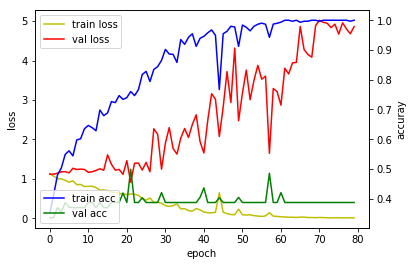

In [17]:
loss_and_acc_plot(hist)

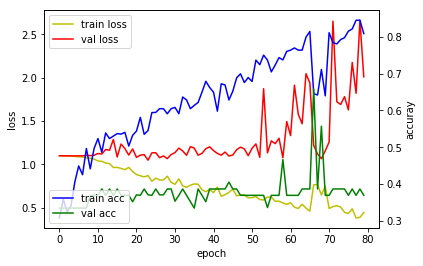

In [18]:
loss_and_acc_plot(hist2)

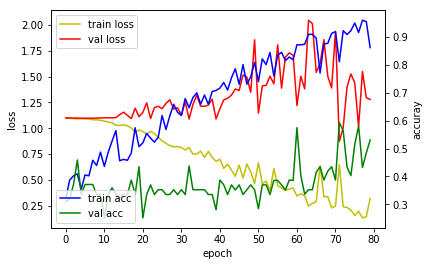

In [19]:
loss_and_acc_plot(hist3)

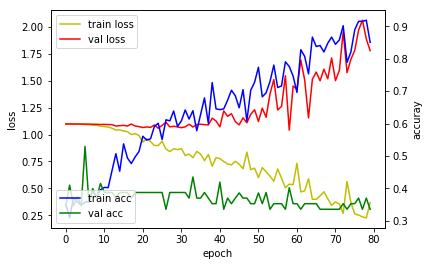

In [20]:
loss_and_acc_plot(hist4)

In [90]:
print("-- Evaluate --")
scores1 = model1.evaluate_generator(val_generator, steps=10)
print("model1 %s: %.2f%%" %(model1.metrics_names[1], scores1[1]*100))

print("-- Evaluate --")
scores2 = model2.evaluate_generator(val_generator, steps=10)
print("model2 %s: %.2f%%" %(model2.metrics_names[1], scores2[1]*100))

print("-- Evaluate --")
scores3 = model3.evaluate_generator(val_generator, steps=10)
print("model3 %s: %.2f%%" %(model3.metrics_names[1], scores3[1]*100))

print("-- Evaluate --")
scores4 = model4.evaluate_generator(val_generator, steps=10)
print("model1 %s: %.2f%%" %(model4.metrics_names[1], scores1[1]*100))

acc1 = scores1[1]
acc2 = scores2[1]
acc3 = scores3[1]
acc4 = scores4[1]

-- Evaluate --
model1 acc: 38.33%
-- Evaluate --
model2 acc: 36.67%
-- Evaluate --
model3 acc: 53.33%
-- Evaluate --
model1 acc: 38.33%


In [87]:
# ensemble(prob1,prob2,acc_list = [1,2] )
def model_ensemble(*prob, acc_list):
    prob_list = [p for p in prob]

    idx_acc_list = {idx: acc for idx, acc in enumerate(acc_list)}
    sorted_acc_list = [idx for idx, _ in sorted(idx_acc_list.items(),
                                                key=lambda value: (value[1], value[0]), reverse=True)]
    output = []
    for i in sorted_acc_list:
        temp = [x * (i + 1) for x in prob_list[i]]
        output.append(temp)
    final_prob = np.sum(output, axis=0)  # class갯수만큼 확률값 지금은 1*2

    final_score = np.mean(np.equal(np.argmax(final_prob, axis=1), val_generator.classes))
    print('Final val accuracy : %4f' % final_score)

    return final_prob

In [93]:
prob1 = model1.predict_generator(val_generator, steps=1)
prob2 = model2.predict_generator(val_generator, steps=1)
prob3 = model3.predict_generator(val_generator, steps=1)
prob4 = model4.predict_generator(val_generator, steps=1)

In [94]:
final_prob = model_ensemble(prob1,prob2,prob3,prob4, acc_list =[acc1,acc2,acc3,acc4] )
val_label = val_generator.class_indices
val_label_temp = list(val_label.keys())

pred = [val_label_temp[np.argmax(x)] for x in final_prob ]

Final val accuracy : 0.366667


In [100]:
pred2 = [val_label_temp[np.argmax(x)] for x in prob3 ]

# actual label

In [95]:
label = val_generator.class_indices
label_temp = list(label.keys())

actual = []
for x in val_generator.index_array:
    temp = val_generator.classes[x]
    actual.append(label_temp[temp])

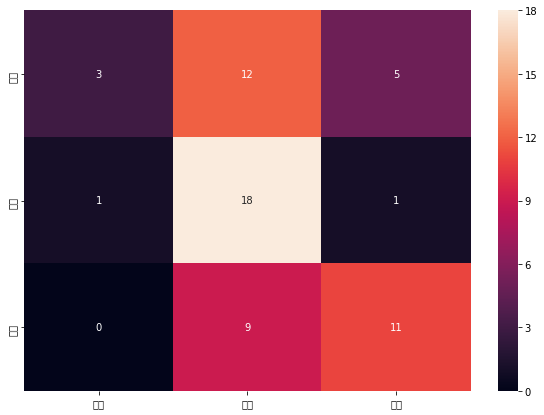

In [101]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

confusion_mtx = confusion_matrix(actual, pred) #pred2 

df_cm = pd.DataFrame(confusion_mtx, index = [i for i in label_temp],
                  columns = [i for i in label_temp])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [102]:
df_cm 

,계단,과제,구름
계단,3,12,5
과제,1,18,1
구름,0,9,11
